# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from random import uniform
# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1600)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1600)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        # Print the city count to confirm sufficient count
len(cities)

640

In [4]:
city_list = pd.DataFrame(cities)
city_list.head()

,0
0,ushuaia
1,kapaa
2,fredericksburg
3,guaymas
4,illoqqortoormiut


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "Imperial"

query_url = f"{url}appid={weather_api_key}&units={units}"

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial


In [6]:
all_city_data = []
for city in cities:
    city_url = query_url + "&q=" + city
    try:
        city_weather = requests.get(city_url).json()
        print(json.dumps(city_weather, indent=4, sort_keys=True))    
        print(city_url)
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_temperature = city_weather["main"]["temp_max"]
        city_humid = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        all_city_data.append({"City": city, 
                              "Latitude": city_lat,
                              "Longitude": city_lon,
                              "Temperature": city_temperature,
                              "Humidity": city_humid,
                              "Clouds": city_clouds,
                              "Wind": city_wind,
                              "Country": city_country,
                              "Date": city_date})
    except:
        print("City not found")
        pass
    #break

# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -54.8,
        "lon": -68.3
    },
    "dt": 1601477472,
    "id": 3833367,
    "main": {
        "feels_like": 21.27,
        "humidity": 80,
        "pressure": 981,
        "temp": 33.8,
        "temp_max": 33.8,
        "temp_min": 33.8
    },
    "name": "Ushuaia",
    "sys": {
        "country": "AR",
        "id": 8303,
        "sunrise": 1601459990,
        "sunset": 1601505963,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 14.99
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=ushuaia
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 18.73,
        "lon": -103.68
    },
    "dt": 1601477476,
    "id": 4013679,
    "main": {
        "feels_like": 68.63,
        "humidity": 68,
        "pressure": 1018,
        "temp": 71.6,
        "temp_max": 71.6,
        "temp_min": 71.6
    },
    "name": "Coahuayana Viejo",
    "sys": {
        "country": "MX",
        "id": 7116,
        "sunrise": 1601469906,
        "sunset": 1601513025,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 9656,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 11.41
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=coahuayana
{
    "base": "stations",
    "clouds": {
        "all": 76
    },

{
    "base": "stations",
    "clouds": {
        "all": 42
    },
    "cod": 200,
    "coord": {
        "lat": -21.21,
        "lon": -159.78
    },
    "dt": 1601477480,
    "id": 4035715,
    "main": {
        "feels_like": 73.65,
        "humidity": 94,
        "pressure": 1017,
        "temp": 75.2,
        "temp_max": 75.2,
        "temp_min": 75.2
    },
    "name": "Avarua",
    "rain": {
        "1h": 0.11
    },
    "sys": {
        "country": "CK",
        "id": 7271,
        "sunrise": 1601482819,
        "sunset": 1601527034,
        "type": 1
    },
    "timezone": -36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 70,
        "speed": 19.46
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=avarua
{
    "base": "stations",
    "clouds": {
  

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 58.81,
        "lon": -122.7
    },
    "dt": 1601477484,
    "id": 5955902,
    "main": {
        "feels_like": 22.37,
        "humidity": 92,
        "pressure": 1029,
        "temp": 28.4,
        "temp_max": 28.4,
        "temp_min": 28.4
    },
    "name": "Fort Nelson",
    "sys": {
        "country": "CA",
        "id": 986,
        "sunrise": 1601475278,
        "sunset": 1601516781,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 3.04
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=fort nelson
{
    "base": "stations",
    "clouds": {
        "all": 56
    },
    "cod

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -42.78,
        "lon": 147.06
    },
    "dt": 1601477487,
    "id": 2155415,
    "main": {
        "feels_like": 46.89,
        "humidity": 72,
        "pressure": 1000,
        "temp": 49.96,
        "temp_max": 52,
        "temp_min": 46.99
    },
    "name": "New Norfolk",
    "sys": {
        "country": "AU",
        "id": 2031307,
        "sunrise": 1601495097,
        "sunset": 1601540267,
        "type": 3
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 303,
        "gust": 7,
        "speed": 1.99
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=new norfolk
{
    "base": "stations",
    "clouds": {
    

}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=aguas belas
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 70.47,
        "lon": -68.59
    },
    "dt": 1601477491,
    "id": 5924351,
    "main": {
        "feels_like": 19.54,
        "humidity": 92,
        "pressure": 1020,
        "temp": 28.4,
        "temp_max": 28.4,
        "temp_min": 28.4
    },
    "name": "Clyde River",
    "sys": {
        "country": "CA",
        "id": 776,
        "sunrise": 1601462917,
        "sunset": 1601503175,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "shower rain",
            "icon": "09d",
            "id": 521,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 300,
        "speed": 8.05
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e

{
    "base": "stations",
    "clouds": {
        "all": 77
    },
    "cod": 200,
    "coord": {
        "lat": 60.74,
        "lon": 24.78
    },
    "dt": 1601477494,
    "id": 639406,
    "main": {
        "feels_like": 57.22,
        "humidity": 83,
        "pressure": 1020,
        "temp": 58.01,
        "temp_max": 59,
        "temp_min": 57
    },
    "name": "Riihim\u00e4ki",
    "sys": {
        "country": "FI",
        "id": 268547,
        "sunrise": 1601439899,
        "sunset": 1601481386,
        "type": 3
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 158,
        "gust": 8.01,
        "speed": 3
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=riihimaki
{
    "cod": "404",
    "message": "city not found"
}
h

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 9.3,
        "lon": 13.4
    },
    "dt": 1601477498,
    "id": 2231320,
    "main": {
        "feels_like": 95.23,
        "humidity": 55,
        "pressure": 1010,
        "temp": 89.6,
        "temp_max": 89.6,
        "temp_min": 89.6
    },
    "name": "Garoua",
    "sys": {
        "country": "CM",
        "id": 2091,
        "sunrise": 1601441687,
        "sunset": 1601485059,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 270,
        "speed": 4.7
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=garoua
{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
  

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 64.5,
        "lon": -165.41
    },
    "dt": 1601477502,
    "id": 5870133,
    "main": {
        "feels_like": 33.64,
        "humidity": 70,
        "pressure": 1009,
        "temp": 41.11,
        "temp_max": 42.8,
        "temp_min": 39
    },
    "name": "Nome",
    "sys": {
        "country": "US",
        "id": 7770,
        "sunrise": 1601485803,
        "sunset": 1601526752,
        "type": 1
    },
    "timezone": -28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 350,
        "speed": 6.93
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=nome
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
  

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 48.6,
        "lon": -93.4
    },
    "dt": 1601477505,
    "id": 5955826,
    "main": {
        "feels_like": 41.5,
        "humidity": 81,
        "pressure": 1004,
        "temp": 48.85,
        "temp_max": 50,
        "temp_min": 48
    },
    "name": "Fort Frances",
    "sys": {
        "country": "CA",
        "id": 4536,
        "sunrise": 1601467935,
        "sunset": 1601510063,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 320,
        "gust": 23.04,
        "speed": 10.29
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=fort frances
{
    "base": "stations",
    "clouds": {
       

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 11.67,
        "lon": 92.75
    },
    "dt": 1601477508,
    "id": 1259385,
    "main": {
        "feels_like": 82.94,
        "grnd_level": 1008,
        "humidity": 82,
        "pressure": 1008,
        "sea_level": 1008,
        "temp": 81.55,
        "temp_max": 81.55,
        "temp_min": 81.55
    },
    "name": "Port Blair",
    "rain": {
        "1h": 1.6192
    },
    "sys": {
        "country": "IN",
        "sunrise": 1601422672,
        "sunset": 1601465995
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10n",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 241,
        "speed": 16.46
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=port blair
{
    "base": "

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -33.75,
        "lon": -61.97
    },
    "dt": 1601477512,
    "id": 3833062,
    "main": {
        "feels_like": 76.14,
        "humidity": 53,
        "pressure": 1006,
        "temp": 78.51,
        "temp_max": 79,
        "temp_min": 78.01
    },
    "name": "Venado Tuerto",
    "sys": {
        "country": "AR",
        "id": 2034587,
        "sunrise": 1601459129,
        "sunset": 1601503786,
        "type": 3
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 0,
        "gust": 15.01,
        "speed": 10
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=venado tuerto
{
    "base": "stations",
    "clouds": {
        

}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=nikolskoye
{
    "base": "stations",
    "clouds": {
        "all": 64
    },
    "cod": 200,
    "coord": {
        "lat": -8.93,
        "lon": 125.41
    },
    "dt": 1601477516,
    "id": 1651810,
    "main": {
        "feels_like": 61.18,
        "grnd_level": 855,
        "humidity": 86,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 60.73,
        "temp_max": 60.73,
        "temp_min": 60.73
    },
    "name": "Airai",
    "sys": {
        "country": "TL",
        "sunrise": 1601414588,
        "sunset": 1601458406
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 95,
        "speed": 2.82
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 57.05,
        "lon": -135.33
    },
    "dt": 1601477519,
    "id": 5557293,
    "main": {
        "feels_like": 54.91,
        "humidity": 48,
        "pressure": 1007,
        "temp": 66.2,
        "temp_max": 66.2,
        "temp_min": 66.2
    },
    "name": "Sitka",
    "sys": {
        "country": "US",
        "id": 7795,
        "sunrise": 1601478250,
        "sunset": 1601519870,
        "type": 1
    },
    "timezone": -28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "gust": 28.86,
        "speed": 18.34
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=sitka
{
    "base": "stations",
    "clouds": {
        "all": 75
 

{
    "base": "stations",
    "clouds": {
        "all": 82
    },
    "cod": 200,
    "coord": {
        "lat": -13.2,
        "lon": 49.05
    },
    "dt": 1601477523,
    "id": 1082243,
    "main": {
        "feels_like": 84.54,
        "grnd_level": 1009,
        "humidity": 81,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 77.54,
        "temp_max": 77.54,
        "temp_min": 77.54
    },
    "name": "Ambilobe",
    "rain": {
        "1h": 0.85
    },
    "sys": {
        "country": "MG",
        "sunrise": 1601432849,
        "sunset": 1601476789
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 340,
        "speed": 2.26
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=ambilobe
{
    "base": "stations",

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 22.57,
        "lon": 59.53
    },
    "dt": 1601477527,
    "id": 286245,
    "main": {
        "feels_like": 88.03,
        "grnd_level": 1007,
        "humidity": 60,
        "pressure": 1008,
        "sea_level": 1008,
        "temp": 82.9,
        "temp_max": 82.9,
        "temp_min": 82.9
    },
    "name": "Sur",
    "sys": {
        "country": "OM",
        "sunrise": 1601430779,
        "sunset": 1601473830
    },
    "timezone": 14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 189,
        "speed": 2.35
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=sur
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 20

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 4.92,
        "lon": 6.26
    },
    "dt": 1601477531,
    "id": 2318123,
    "main": {
        "feels_like": 86.58,
        "grnd_level": 1008,
        "humidity": 80,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 81.46,
        "temp_max": 81.46,
        "temp_min": 81.46
    },
    "name": "Yenagoa",
    "rain": {
        "1h": 0.91
    },
    "sys": {
        "country": "NG",
        "sunrise": 1601443347,
        "sunset": 1601486825
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 227,
        "speed": 8.97
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=yenagoa
{
    "base": "stations",
   

{
    "base": "stations",
    "clouds": {
        "all": 57
    },
    "cod": 200,
    "coord": {
        "lat": 22.27,
        "lon": -101.97
    },
    "dt": 1601477308,
    "id": 3998291,
    "main": {
        "feels_like": 52.23,
        "grnd_level": 808,
        "humidity": 67,
        "pressure": 1024,
        "sea_level": 1024,
        "temp": 56.97,
        "temp_max": 56.97,
        "temp_min": 56.97
    },
    "name": "Loreto",
    "sys": {
        "country": "MX",
        "sunrise": 1601469543,
        "sunset": 1601512568
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 57,
        "speed": 6.8
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=loreto
{
    "base": "stations",
    "clouds": {
        "all": 94
    

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 22.68,
        "lon": -3.98
    },
    "dt": 1601477539,
    "id": 2450173,
    "main": {
        "feels_like": 101.88,
        "grnd_level": 991,
        "humidity": 6,
        "pressure": 1006,
        "sea_level": 1006,
        "temp": 111.72,
        "temp_max": 111.72,
        "temp_min": 111.72
    },
    "name": "Taoudenni",
    "sys": {
        "country": "ML",
        "sunrise": 1601446026,
        "sunset": 1601489060
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 97,
        "speed": 10.51
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=taoudenni
{
    "base": "stations",
    "clouds": {
        "all": 9
    },


{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 37.72,
        "lon": -25.43
    },
    "dt": 1601477542,
    "id": 3372472,
    "main": {
        "feels_like": 66.83,
        "humidity": 68,
        "pressure": 1027,
        "temp": 69.8,
        "temp_max": 69.8,
        "temp_min": 69.8
    },
    "name": "Vila Franca do Campo",
    "sys": {
        "country": "PT",
        "id": 6899,
        "sunrise": 1601451396,
        "sunset": 1601493984,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 20,
        "speed": 10.29
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=vila franca do campo
{
    "base": "stations",
    "clouds": {
        "all": 8

}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=port macquarie
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -2.57,
        "lon": 150.8
    },
    "dt": 1601477546,
    "id": 2094342,
    "main": {
        "feels_like": 88.38,
        "grnd_level": 1005,
        "humidity": 74,
        "pressure": 1007,
        "sea_level": 1007,
        "temp": 81.81,
        "temp_max": 81.81,
        "temp_min": 81.81
    },
    "name": "Kavieng",
    "rain": {
        "1h": 0.19
    },
    "sys": {
        "country": "PG",
        "sunrise": 1601494950,
        "sunset": 1601538619
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 118,
        "speed": 4.41
    }
}
http://api.openwe

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 29.07,
        "lon": 31.1
    },
    "dt": 1601477549,
    "id": 359173,
    "main": {
        "feels_like": 90.07,
        "grnd_level": 1003,
        "humidity": 13,
        "pressure": 1006,
        "sea_level": 1006,
        "temp": 100.85,
        "temp_max": 100.85,
        "temp_min": 100.85
    },
    "name": "Beni Suef",
    "sys": {
        "country": "EG",
        "sunrise": 1601437690,
        "sunset": 1601480562
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 15.52
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=beni suef
{
    "base": "stations",
    "clouds": {
        "all": 75
    

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -20.94,
        "lon": 55.29
    },
    "dt": 1601477552,
    "id": 935616,
    "main": {
        "feels_like": 69.64,
        "humidity": 73,
        "pressure": 1016,
        "temp": 69.94,
        "temp_max": 75.2,
        "temp_min": 62.01
    },
    "name": "Le Port",
    "sys": {
        "country": "RE",
        "id": 2133,
        "sunrise": 1601431240,
        "sunset": 1601475403,
        "type": 1
    },
    "timezone": 14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 6.93
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=le port
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod":

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 27.74,
        "lon": 66.64
    },
    "dt": 1601477556,
    "id": 7082481,
    "main": {
        "feels_like": 69.12,
        "grnd_level": 879,
        "humidity": 19,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 78.87,
        "temp_max": 78.87,
        "temp_min": 78.87
    },
    "name": "Khuzdar",
    "sys": {
        "country": "PK",
        "sunrise": 1601429140,
        "sunset": 1601472057
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 338,
        "speed": 11.27
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=khuzdar
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
 

}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=varberg
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 27.98,
        "lon": -114.06
    },
    "dt": 1601477559,
    "id": 4021858,
    "main": {
        "feels_like": 83.97,
        "grnd_level": 1013,
        "humidity": 41,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 82.96,
        "temp_max": 82.96,
        "temp_min": 82.96
    },
    "name": "Guerrero Negro",
    "sys": {
        "country": "MX",
        "sunrise": 1601472526,
        "sunset": 1601515387
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 307,
        "speed": 2.01
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 38.73,
        "lon": -27.07
    },
    "dt": 1601477564,
    "id": 3372760,
    "main": {
        "feels_like": 69.6,
        "humidity": 73,
        "pressure": 1027,
        "temp": 73.38,
        "temp_max": 75.2,
        "temp_min": 71.01
    },
    "name": "Praia da Vit\u00f3ria",
    "sys": {
        "country": "PT",
        "id": 6895,
        "sunrise": 1601451807,
        "sunset": 1601494361,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 313,
        "speed": 15.48
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=praia da vitoria
{
    "base": "stations",
    "clouds": {
        "all": 1


{
    "base": "stations",
    "clouds": {
        "all": 8
    },
    "cod": 200,
    "coord": {
        "lat": 52.27,
        "lon": 79.17
    },
    "dt": 1601477568,
    "id": 1503153,
    "main": {
        "feels_like": 34.92,
        "grnd_level": 1015,
        "humidity": 64,
        "pressure": 1032,
        "sea_level": 1032,
        "temp": 40.59,
        "temp_max": 40.59,
        "temp_min": 40.59
    },
    "name": "Klyuchi",
    "sys": {
        "country": "RU",
        "sunrise": 1601426563,
        "sunset": 1601468621
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 295,
        "speed": 3.09
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=klyuchi
{
    "base": "stations",
    "clouds": {
        "all": 58
    },
 

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 66.83,
        "lon": 70.83
    },
    "dt": 1601477572,
    "id": 1486321,
    "main": {
        "feels_like": 36.63,
        "grnd_level": 1024,
        "humidity": 87,
        "pressure": 1025,
        "sea_level": 1025,
        "temp": 42.8,
        "temp_max": 42.8,
        "temp_min": 42.8
    },
    "name": "Yar-Sale",
    "sys": {
        "country": "RU",
        "sunrise": 1601429114,
        "sunset": 1601470072
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 184,
        "speed": 6.73
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=yar-sale
{
    "base": "stations",
    "clouds": {
        "all": 1
 

{
    "base": "stations",
    "clouds": {
        "all": 93
    },
    "cod": 200,
    "coord": {
        "lat": -14.97,
        "lon": 22.68
    },
    "dt": 1601477575,
    "id": 915471,
    "main": {
        "feels_like": 86.68,
        "grnd_level": 898,
        "humidity": 27,
        "pressure": 1006,
        "sea_level": 1006,
        "temp": 89.69,
        "temp_max": 89.69,
        "temp_min": 89.69
    },
    "name": "Kalabo",
    "sys": {
        "country": "ZM",
        "sunrise": 1601439150,
        "sunset": 1601483142
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 36,
        "speed": 6.08
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=kalabo
{
    "base": "stations",
    "clouds": {
        "all": 6
    },

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 16.41,
        "lon": -3.67
    },
    "dt": 1601477579,
    "id": 2456917,
    "main": {
        "feels_like": 97.7,
        "grnd_level": 977,
        "humidity": 9,
        "pressure": 1005,
        "sea_level": 1005,
        "temp": 107.74,
        "temp_max": 107.74,
        "temp_min": 107.74
    },
    "name": "Goundam",
    "sys": {
        "country": "ML",
        "sunrise": 1601445872,
        "sunset": 1601489066
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 45,
        "speed": 12.84
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=goundam
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "

}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=yueyang
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 69.22,
        "lon": -51.1
    },
    "dt": 1601477582,
    "id": 3423146,
    "main": {
        "feels_like": 19.89,
        "humidity": 42,
        "pressure": 1017,
        "temp": 30.2,
        "temp_max": 30.2,
        "temp_min": 30.2
    },
    "name": "Ilulissat",
    "sys": {
        "country": "GL",
        "id": 165,
        "sunrise": 1601458607,
        "sunset": 1601499092,
        "type": 1
    },
    "timezone": -7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 90,
        "speed": 8.05
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d

{
    "base": "stations",
    "clouds": {
        "all": 88
    },
    "cod": 200,
    "coord": {
        "lat": -14.66,
        "lon": 17.69
    },
    "dt": 1601477586,
    "id": 3347353,
    "main": {
        "feels_like": 82.74,
        "grnd_level": 865,
        "humidity": 23,
        "pressure": 1004,
        "sea_level": 1004,
        "temp": 88.09,
        "temp_max": 88.09,
        "temp_min": 88.09
    },
    "name": "Menongue",
    "sys": {
        "country": "AO",
        "sunrise": 1601440352,
        "sunset": 1601484336
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 2,
        "speed": 7.67
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=menongue
{
    "base": "stations",
    "clouds": {
        "all": 75
 

{
    "base": "stations",
    "clouds": {
        "all": 26
    },
    "cod": 200,
    "coord": {
        "lat": -35.53,
        "lon": 144.97
    },
    "dt": 1601477589,
    "id": 2169068,
    "main": {
        "feels_like": 52.39,
        "humidity": 88,
        "pressure": 1011,
        "temp": 53.01,
        "temp_max": 53.01,
        "temp_min": 53.01
    },
    "name": "Deniliquin",
    "sys": {
        "country": "AU",
        "id": 2018904,
        "sunrise": 1601495788,
        "sunset": 1601540579,
        "type": 3
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 262,
        "gust": 4,
        "speed": 1.01
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=deniliquin
{
    "base": "stations",
    "clouds": {
   

}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=inuvik
{
    "base": "stations",
    "clouds": {
        "all": 31
    },
    "cod": 200,
    "coord": {
        "lat": -8.47,
        "lon": 140.33
    },
    "dt": 1601477594,
    "id": 2082539,
    "main": {
        "feels_like": 75.78,
        "grnd_level": 1010,
        "humidity": 79,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 76.78,
        "temp_max": 76.78,
        "temp_min": 76.78
    },
    "name": "Merauke",
    "sys": {
        "country": "ID",
        "sunrise": 1601411014,
        "sunset": 1601454820
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 115,
        "speed": 15.14
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49

{
    "base": "stations",
    "clouds": {
        "all": 42
    },
    "cod": 200,
    "coord": {
        "lat": -2.02,
        "lon": 147.27
    },
    "dt": 1601477597,
    "id": 2092164,
    "main": {
        "feels_like": 88.14,
        "grnd_level": 1007,
        "humidity": 76,
        "pressure": 1007,
        "sea_level": 1007,
        "temp": 81.77,
        "temp_max": 81.77,
        "temp_min": 81.77
    },
    "name": "Lorengau",
    "sys": {
        "country": "PG",
        "sunrise": 1601495805,
        "sunset": 1601539458
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 103,
        "speed": 5.48
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=lorengau
{
    "base": "stations",
    "clouds": {
        "all":

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 51.32,
        "lon": 42.77
    },
    "dt": 1601477600,
    "id": 553766,
    "main": {
        "feels_like": 65.26,
        "humidity": 28,
        "pressure": 1021,
        "temp": 70,
        "temp_max": 70,
        "temp_min": 70
    },
    "name": "Kamenka",
    "sys": {
        "country": "RU",
        "id": 2021293,
        "sunrise": 1601435285,
        "sunset": 1601477366,
        "type": 3
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 118,
        "gust": 15.01,
        "speed": 3
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=kamenka
{
    "base": "stations",
    "clouds": {
        "all": 100
 

{
    "base": "stations",
    "clouds": {
        "all": 89
    },
    "cod": 200,
    "coord": {
        "lat": -1.8,
        "lon": -53.48
    },
    "dt": 1601477604,
    "id": 3391287,
    "main": {
        "feels_like": 96.66,
        "grnd_level": 1007,
        "humidity": 38,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 94.78,
        "temp_max": 94.78,
        "temp_min": 94.78
    },
    "name": "Prainha",
    "sys": {
        "country": "BR",
        "sunrise": 1601457598,
        "sunset": 1601501243
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 93,
        "speed": 6.2
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=prainha
{
    "base": "stations",
    "clouds": {
        "all": 75
 

}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=svetlyy
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 15,
        "lon": -83.23
    },
    "dt": 1601477607,
    "id": 3608828,
    "main": {
        "feels_like": 95.43,
        "humidity": 83,
        "pressure": 1010,
        "temp": 84.2,
        "temp_max": 84.2,
        "temp_min": 84.2
    },
    "name": "Iralaya",
    "sys": {
        "country": "HN",
        "id": 7087,
        "sunrise": 1601464949,
        "sunset": 1601508168,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 2.24
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 66.42,
        "lon": 112.4
    },
    "dt": 1601477610,
    "id": 2014624,
    "main": {
        "feels_like": 15.4,
        "humidity": 85,
        "pressure": 1012,
        "temp": 23,
        "temp_max": 23,
        "temp_min": 23
    },
    "name": "Udachny",
    "sys": {
        "country": "RU",
        "id": 8846,
        "sunrise": 1601419091,
        "sunset": 1601460146,
        "type": 1
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 180,
        "speed": 4.47
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=udachnyy
{
    "base": "stations",
    "clouds": {
        "all": 94
    },
    "cod": 200,
  

{
    "base": "stations",
    "clouds": {
        "all": 89
    },
    "cod": 200,
    "coord": {
        "lat": 5.67,
        "lon": 73
    },
    "dt": 1601477614,
    "id": 1337619,
    "main": {
        "feels_like": 86.09,
        "grnd_level": 1010,
        "humidity": 74,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 82.18,
        "temp_max": 82.18,
        "temp_min": 82.18
    },
    "name": "Ugoofaaru",
    "sys": {
        "country": "MV",
        "sunrise": 1601427341,
        "sunset": 1601470804
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 294,
        "speed": 9.48
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=ugoofaaru
{
    "base": "stations",
    "clouds": {
        "all": 0
 

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 72.79,
        "lon": -56.15
    },
    "dt": 1601477618,
    "id": 3418910,
    "main": {
        "feels_like": 14.54,
        "grnd_level": 1021,
        "humidity": 93,
        "pressure": 1021,
        "sea_level": 1021,
        "temp": 24.93,
        "temp_max": 24.93,
        "temp_min": 24.93
    },
    "name": "Upernavik",
    "sys": {
        "country": "GL",
        "sunrise": 1601460145,
        "sunset": 1601499977
    },
    "timezone": -7200,
    "visibility": 5146,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 129,
        "speed": 10.13
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=upernavik
{
    "base": "stations",
    "clouds": {
        "all

}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=bantry
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 63.84,
        "lon": -22.43
    },
    "dt": 1601477622,
    "id": 3416888,
    "main": {
        "feels_like": 30.99,
        "humidity": 70,
        "pressure": 991,
        "temp": 41,
        "temp_max": 41,
        "temp_min": 41
    },
    "name": "Grindavik",
    "sys": {
        "country": "IS",
        "id": 90,
        "sunrise": 1601451385,
        "sunset": 1601492555,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 220,
        "speed": 11.41
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&

}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=valdosta
{
    "cod": "404",
    "message": "city not found"
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=tabiauea
City not found
{
    "base": "stations",
    "clouds": {
        "all": 60
    },
    "cod": 200,
    "coord": {
        "lat": 52.73,
        "lon": 7.77
    },
    "dt": 1601477626,
    "id": 2875987,
    "main": {
        "feels_like": 64.44,
        "humidity": 78,
        "pressure": 1011,
        "temp": 65.34,
        "temp_max": 66.99,
        "temp_min": 62.01
    },
    "name": "L\u00f6ningen",
    "sys": {
        "country": "DE",
        "id": 2007385,
        "sunrise": 1601443731,
        "sunset": 1601485717,
        "type": 3
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 80

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 0.52,
        "lon": 25.2
    },
    "dt": 1601477629,
    "id": 212730,
    "main": {
        "feels_like": 91.47,
        "humidity": 66,
        "pressure": 1009,
        "temp": 86,
        "temp_max": 86,
        "temp_min": 86
    },
    "name": "Kisangani",
    "sys": {
        "country": "CD",
        "id": 2329,
        "sunrise": 1601438749,
        "sunset": 1601482335,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 6.93
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=kisangani
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
 

{
    "base": "stations",
    "clouds": {
        "all": 85
    },
    "cod": 200,
    "coord": {
        "lat": 55.64,
        "lon": 95.45
    },
    "dt": 1601477633,
    "id": 1505529,
    "main": {
        "feels_like": 25.9,
        "grnd_level": 996,
        "humidity": 91,
        "pressure": 1028,
        "sea_level": 1028,
        "temp": 31.8,
        "temp_max": 31.8,
        "temp_min": 31.8
    },
    "name": "Irbeyskoye",
    "sys": {
        "country": "RU",
        "sunrise": 1601422741,
        "sunset": 1601464630
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 245,
        "speed": 3.51
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=irbeyskoye
{
    "base": "stations",
    "clouds": {
        "all": 10

{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": -14.45,
        "lon": -56.8
    },
    "dt": 1601477636,
    "id": 3456248,
    "main": {
        "feels_like": 103.6,
        "grnd_level": 986,
        "humidity": 14,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 107.51,
        "temp_max": 107.51,
        "temp_min": 107.51
    },
    "name": "Nortel\u00e2ndia",
    "sys": {
        "country": "BR",
        "sunrise": 1601458223,
        "sunset": 1601502211
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 27,
        "speed": 6.17
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=nortelandia
{
    "base": "stations",
    "clouds": {
        "a

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 25.21,
        "lon": 64.64
    },
    "dt": 1601477639,
    "id": 1168700,
    "main": {
        "feels_like": 83.44,
        "grnd_level": 1007,
        "humidity": 73,
        "pressure": 1007,
        "sea_level": 1007,
        "temp": 83.35,
        "temp_max": 83.35,
        "temp_min": 83.35
    },
    "name": "Ormara",
    "sys": {
        "country": "PK",
        "sunrise": 1601429586,
        "sunset": 1601472570
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 254,
        "speed": 16.96
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=ormara
{
    "base": "stations",
    "clouds": {
        "all": 98
    },
  

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 26.12,
        "lon": 127.67
    },
    "dt": 1601477643,
    "id": 1861280,
    "main": {
        "feels_like": 71.26,
        "humidity": 65,
        "pressure": 1006,
        "temp": 77.7,
        "temp_max": 78.8,
        "temp_min": 77
    },
    "name": "Itoman",
    "sys": {
        "country": "JP",
        "id": 8137,
        "sunrise": 1601414467,
        "sunset": 1601457443,
        "type": 1
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 20.8
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=itoman
{
    "cod": "404",
    "message": "city not found"
}
http://api.openweathermap.org/data

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 64.25,
        "lon": -15.21
    },
    "dt": 1601477647,
    "id": 2630299,
    "main": {
        "feels_like": 31.42,
        "humidity": 93,
        "pressure": 989,
        "temp": 41,
        "temp_max": 41,
        "temp_min": 41
    },
    "name": "Hofn",
    "rain": {
        "1h": 2.25
    },
    "sys": {
        "country": "IS",
        "id": 76,
        "sunrise": 1601449669,
        "sunset": 1601490807,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10d",
            "id": 501,
            "main": "Rain"
        },
        {
            "description": "mist",
            "icon": "50d",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 320,
        "speed": 12.75
    }
}
http://api.openweathermap.org/data/

{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": 29.38,
        "lon": 104.03
    },
    "dt": 1601477651,
    "id": 1801983,
    "main": {
        "feels_like": 74.66,
        "grnd_level": 956,
        "humidity": 77,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 70.97,
        "temp_max": 70.97,
        "temp_min": 70.97
    },
    "name": "Luocheng",
    "rain": {
        "1h": 0.1624
    },
    "sys": {
        "country": "CN",
        "sunrise": 1601420185,
        "sunset": 1601463069
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 76,
        "speed": 1.63
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=luocheng
{
    "base": "stations"

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -6.34,
        "lon": 106.1
    },
    "dt": 1601477654,
    "id": 1630058,
    "main": {
        "feels_like": 89.29,
        "humidity": 74,
        "pressure": 1009,
        "temp": 82.92,
        "temp_max": 86,
        "temp_min": 82
    },
    "name": "Karaton",
    "sys": {
        "country": "ID",
        "id": 9384,
        "sunrise": 1601419253,
        "sunset": 1601463007,
        "type": 1
    },
    "timezone": 25200,
    "visibility": 8000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 5.82
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=karaton
{
    "base": "stations",
    "clouds": {
        "all": 82
    },
    "cod": 200,
    "co

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -9.08,
        "lon": 143.21
    },
    "dt": 1601477657,
    "id": 2098329,
    "main": {
        "feels_like": 76.03,
        "grnd_level": 1008,
        "humidity": 84,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 76.87,
        "temp_max": 76.87,
        "temp_min": 76.87
    },
    "name": "Daru",
    "sys": {
        "country": "PG",
        "sunrise": 1601496680,
        "sunset": 1601540531
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 128,
        "speed": 16.58
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=daru
{
    "base": "stations",
    "clouds": {
        "all": 88
   

{
    "base": "stations",
    "clouds": {
        "all": 29
    },
    "cod": 200,
    "coord": {
        "lat": 48.63,
        "lon": 6.35
    },
    "dt": 1601477661,
    "id": 3021221,
    "main": {
        "feels_like": 65.75,
        "humidity": 60,
        "pressure": 1013,
        "temp": 67.44,
        "temp_max": 68,
        "temp_min": 66.2
    },
    "name": "Dombasle-sur-Meurthe",
    "sys": {
        "country": "FR",
        "id": 6590,
        "sunrise": 1601443972,
        "sunset": 1601486157,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 4.7
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=dombasle-sur-meurthe
{
    "base": "stations",
    "clouds": {
        "all":

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 30.33,
        "lon": 10.85
    },
    "dt": 1601477664,
    "id": 2214432,
    "main": {
        "feels_like": 86.23,
        "grnd_level": 955,
        "humidity": 14,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 95.86,
        "temp_max": 95.86,
        "temp_min": 95.86
    },
    "name": "N\u0101l\u016bt",
    "sys": {
        "country": "LY",
        "sunrise": 1601442570,
        "sunset": 1601485400
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 16,
        "speed": 12.8
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=nalut
{
    "base": "stations",
    "clouds": {
        "all": 19
    }

}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=tandil
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -38.47,
        "lon": 175.02
    },
    "dt": 1601477667,
    "id": 2184564,
    "main": {
        "feels_like": 34.23,
        "humidity": 87,
        "pressure": 1009,
        "temp": 37.92,
        "temp_max": 41,
        "temp_min": 35.01
    },
    "name": "Piopio",
    "sys": {
        "country": "NZ",
        "id": 2002626,
        "sunrise": 1601488512,
        "sunset": 1601533434,
        "type": 3
    },
    "timezone": 46800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 92,
        "speed": 0.85
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8d

{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": 5.95,
        "lon": 80.54
    },
    "dt": 1601477671,
    "id": 1235846,
    "main": {
        "feels_like": 81.55,
        "grnd_level": 1008,
        "humidity": 86,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 78.03,
        "temp_max": 78.03,
        "temp_min": 78.03
    },
    "name": "Matara",
    "sys": {
        "country": "LK",
        "sunrise": 1601425535,
        "sunset": 1601468991
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 282,
        "speed": 10.58
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=matara
{
    "base": "stations",
    "clouds": {
        "all": 20
  

}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=puerto madryn
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 55.43,
        "lon": -116.49
    },
    "dt": 1601477674,
    "id": 5975034,
    "main": {
        "feels_like": 35.15,
        "grnd_level": 960,
        "humidity": 79,
        "pressure": 1033,
        "sea_level": 1033,
        "temp": 39.67,
        "temp_max": 39.67,
        "temp_min": 39.67
    },
    "name": "High Prairie",
    "sys": {
        "country": "CA",
        "sunrise": 1601473669,
        "sunset": 1601515410
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 140,
        "speed": 2.13
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=

{
    "base": "stations",
    "clouds": {
        "all": 49
    },
    "cod": 200,
    "coord": {
        "lat": -46.13,
        "lon": 167.68
    },
    "dt": 1601477677,
    "id": 2180815,
    "main": {
        "feels_like": 36.86,
        "humidity": 93,
        "pressure": 1022,
        "temp": 39.99,
        "temp_max": 39.99,
        "temp_min": 39.99
    },
    "name": "Tuatapere",
    "sys": {
        "country": "NZ",
        "id": 2008959,
        "sunrise": 1601490050,
        "sunset": 1601535419,
        "type": 3
    },
    "timezone": 46800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 324,
        "gust": 4,
        "speed": 1.01
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=tuatapere
{
    "base": "stations",
    "clouds": {
     

}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=prince rupert
{
    "base": "stations",
    "clouds": {
        "all": 23
    },
    "cod": 200,
    "coord": {
        "lat": 63.18,
        "lon": 14.64
    },
    "dt": 1601477681,
    "id": 2685750,
    "main": {
        "feels_like": 48.27,
        "humidity": 66,
        "pressure": 1015,
        "temp": 55.4,
        "temp_max": 55.4,
        "temp_min": 55.4
    },
    "name": "\u00d6stersund",
    "sys": {
        "country": "SE",
        "id": 1774,
        "sunrise": 1601442440,
        "sunset": 1601483711,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 170,
        "speed": 10.29
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c06097

{
    "base": "stations",
    "clouds": {
        "all": 82
    },
    "cod": 200,
    "coord": {
        "lat": 22.93,
        "lon": 57.53
    },
    "dt": 1601477684,
    "id": 286987,
    "main": {
        "feels_like": 86.52,
        "grnd_level": 951,
        "humidity": 17,
        "pressure": 1008,
        "sea_level": 1008,
        "temp": 91.45,
        "temp_max": 91.45,
        "temp_min": 91.45
    },
    "name": "Nizw\u00e1",
    "sys": {
        "country": "OM",
        "sunrise": 1601431264,
        "sunset": 1601474305
    },
    "timezone": 14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 185,
        "speed": 4.97
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=nizwa
{
    "base": "stations",
    "clouds": {
        "all": 4
    

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 27.91,
        "lon": -15.45
    },
    "dt": 1601477688,
    "id": 2522325,
    "main": {
        "feels_like": 70.27,
        "humidity": 61,
        "pressure": 1018,
        "temp": 78.44,
        "temp_max": 78.8,
        "temp_min": 78.01
    },
    "name": "Ag\u00fcimes",
    "sys": {
        "country": "ES",
        "id": 2378,
        "sunrise": 1601448850,
        "sunset": 1601491741,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 30,
        "speed": 23.04
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=aguimes
{
    "base": "stations",
    "clouds": {
        "all": 30
    },
    "cod":

{
    "base": "stations",
    "clouds": {
        "all": 72
    },
    "cod": 200,
    "coord": {
        "lat": 36.09,
        "lon": 111.52
    },
    "dt": 1601477691,
    "id": 1803567,
    "main": {
        "feels_like": 67.86,
        "grnd_level": 961,
        "humidity": 61,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 68.05,
        "temp_max": 68.05,
        "temp_min": 68.05
    },
    "name": "Linfen",
    "sys": {
        "country": "CN",
        "sunrise": 1601418483,
        "sunset": 1601461177
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 229,
        "speed": 2.59
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=linfen
{
    "base": "stations",
    "clouds": {
        "all": 43
    

{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": 10.4,
        "lon": 5.47
    },
    "dt": 1601477694,
    "id": 2334008,
    "main": {
        "feels_like": 89.35,
        "grnd_level": 970,
        "humidity": 74,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 81.63,
        "temp_max": 81.63,
        "temp_min": 81.63
    },
    "name": "Kontagora",
    "rain": {
        "1h": 0.83
    },
    "sys": {
        "country": "NG",
        "sunrise": 1601443604,
        "sunset": 1601486948
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 133,
        "speed": 2.17
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=kontagora
{
    "base": "stations",
 

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -7.44,
        "lon": 37.7
    },
    "dt": 1601477697,
    "id": 157014,
    "main": {
        "feels_like": 87.35,
        "grnd_level": 993,
        "humidity": 32,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 88.14,
        "temp_max": 88.14,
        "temp_min": 88.14
    },
    "name": "Kisanga",
    "sys": {
        "country": "TZ",
        "sunrise": 1601435649,
        "sunset": 1601479436
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 82,
        "speed": 3.89
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=kisanga
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 10.45,
        "lon": 38.2
    },
    "dt": 1601477700,
    "id": 342190,
    "main": {
        "feels_like": 59.23,
        "grnd_level": 754,
        "humidity": 88,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 58.82,
        "temp_max": 58.82,
        "temp_min": 58.82
    },
    "name": "Bichena",
    "rain": {
        "1h": 1.8
    },
    "sys": {
        "country": "ET",
        "sunrise": 1601435749,
        "sunset": 1601479095
    },
    "timezone": 10800,
    "visibility": 8680,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10d",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 244,
        "speed": 2.17
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=bichena
{
    "base": "stations",
  

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_data_df = pd.DataFrame(all_city_data)
city_data_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Clouds,Wind,Country,Date
0,ushuaia,-54.80,-68.30,33.80,80,75,14.99,AR,1601477472
1,kapaa,22.08,-159.32,71.60,78,1,9.17,US,1601477473
2,fredericksburg,38.30,-77.46,64.99,68,1,8.05,US,1601477385
3,guaymas,27.93,-110.90,80.60,83,5,3.31,MX,1601477473
4,qaanaaq,77.48,-69.36,13.96,80,0,6.91,GL,1601477474


In [ ]:
city_data_df.to_csv("city_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
#  Get the indices of cities that have humidity over 100%.
def getIndexes (city_data_df, value):
    high_humidity = list()
    result = city_data_df.isin([105])
    series_city = result.any()
    column_names = list(series_city[series_city == True].index)
    for col in column_names:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            high_humidity.append((row, col))
        return high_humidity
            

In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = pd.DataFrame(np.random.randn(101, 3))
clean_city_data[(np.abs(stats.zscore(city_data_df)) >100).all(axis=1)]
clean_city_data.head()

NameError: name 'stats' is not defined

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

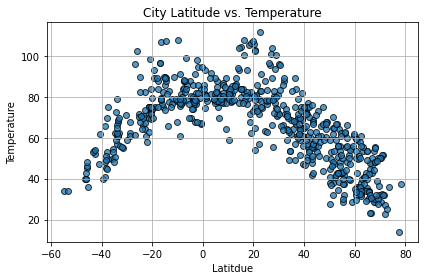

In [21]:
plt.scatter(city_data_df["Latitude"], city_data_df["Temperature"], alpha = .75, edgecolors = "k")
plt.title(f"City Latitude vs. Temperature")
plt.xlabel("Latitdue")
plt.ylabel("Temperature")
plt.grid(True)
plt.tight_layout()
#plt.savefig("temp.png")
plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

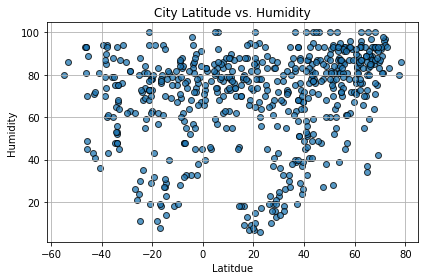

In [22]:
plt.scatter(city_data_df["Latitude"], city_data_df["Humidity"], alpha = .75, edgecolors = "k")
plt.title(f"City Latitude vs. Humidity")
plt.xlabel("Latitdue")
plt.ylabel("Humidity")
plt.grid(True)
plt.tight_layout()
#plt.savefig("temp.png")
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

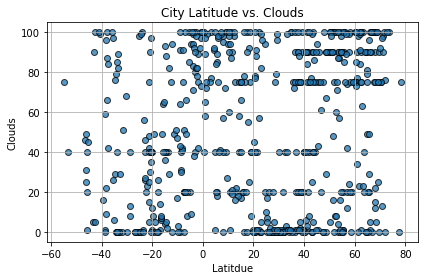

In [23]:
plt.scatter(city_data_df["Latitude"], city_data_df["Clouds"], alpha = .75, edgecolors = "k")
plt.title(f"City Latitude vs. Clouds")
plt.xlabel("Latitdue")
plt.ylabel("Clouds")
plt.grid(True)
plt.tight_layout()
#plt.savefig("temp.png")
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

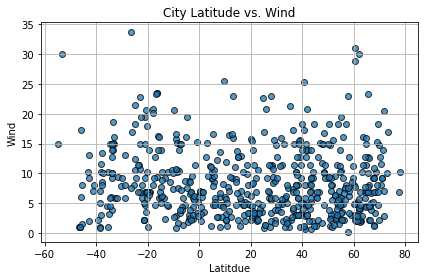

In [24]:
plt.scatter(city_data_df["Latitude"], city_data_df["Wind"], alpha = .75, edgecolors = "k")
plt.title(f"City Latitude vs. Wind")
plt.xlabel("Latitdue")
plt.ylabel("Wind")
plt.grid(True)
plt.tight_layout()
#plt.savefig("temp.png")
plt.show

## Linear Regression

In [36]:
northern = city_data_df.loc[city_data_df["Latitude"] >= 0.0]
northern.reset_index(inplace=True)

southern = city_data_df.loc[city_data_df["Latitude"] < 0.0]
southern.reset_index(inplace=True)

In [37]:
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    #plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8200103128094


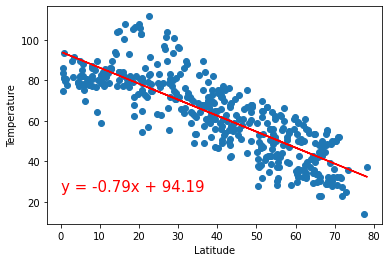

In [38]:
xlbl = "Latitude"
ylbl = "Temperature"
lblpos = (0,25)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,5)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7442064757266686


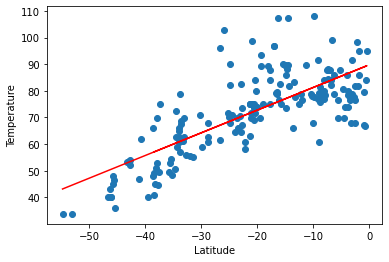

In [42]:
xlbl = "Latitude"
ylbl = "Temperature"
lblpos = (-60,90)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.26890293844939284


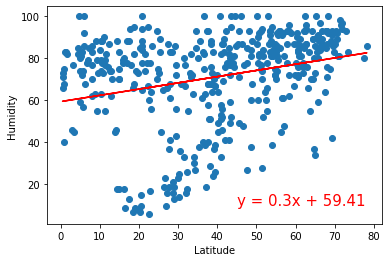

In [43]:
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,7)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.08797507455997641


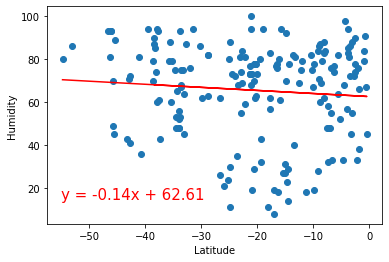

In [44]:
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (-55,15)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09941503181968774


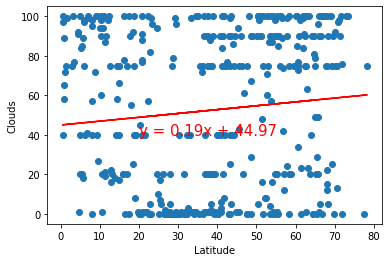

In [45]:
xlbl = "Latitude"
ylbl = "Clouds"
lblpos = (20,40)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,9)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2206501881728997


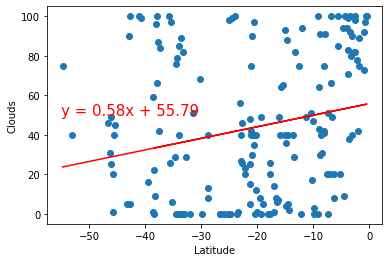

In [46]:
xlbl = "Latitude"
ylbl = "Clouds"
lblpos = (-55,50)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,9)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05832171771187863


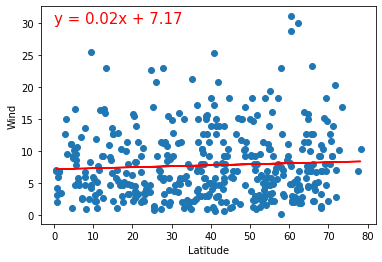

In [47]:
xlbl = "Latitude"
ylbl = "Wind"
lblpos = (0,30)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,11)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.0765729707908385


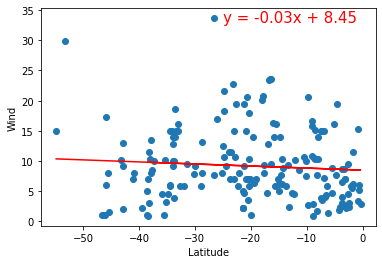

In [48]:
xlbl = "Latitude"
ylbl = "Wind"
lblpos = (-25,33)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,12)